In [1]:
import numpy as np
import pandas as pd
import nnkcde
from cdetools.cde_loss import cde_loss
from matplotlib import pyplot as plt

## Load simulated data

In [2]:
series = pd.read_csv("/Users/arthurthomas/Documents/GitHub/NNKCDE/python/data/Simu_ARMA.txt",sep =' ',header=0)

In [3]:
train_limit_points = 1000   # Limiting the training set
test_limit_points = 1000 
#M=100     # Limiting the test set
h=1

x_train=series["V1"].shift(1).dropna()
#x_train.columns = ['lag_1']#,'lag_2', 'lag_3', 'lag_4']
x_train=x_train[0:train_limit_points]
x_train
z_train=series["V1"]
z_train=z_train[0:train_limit_points]
x_train=x_train.values
z_train=z_train.values


In [4]:
# Number of observations in a simulated trajectory
N    = 10^7   
  
# burn initial and terminal values
burn = 50
  
# MARMA parameters
psi = 0.9
phi = -0.3
the = -0.4
eta = 0.3

# Stable distribution parameters
alp = 1.8
bet = 0.5
sig = 0.2
delta = 10



In [5]:
import numpy as np

def compute_coeff_ma():
    # Length of vector containing MA coefficeints
    N= 3*10^3
    # MARMA parameters
    psi = 0.9
    phi = -0.3
    the = -0.4
    eta = 0.3
    # Stable distribution parameters
    alp = 1.8
    bet = 0.5
    sig = 0.2
    delta = 10
  
    # Simple way of computing MA coefficients in the case of a MARMA process
    # based on a causal-noncausal decomposition a la Lanne, Saikkonen / Gourieroux, Jasiak
    eps      = np.zeros(N,float)
    eps[N/2] = 1

    y = np.zeros(N,float)
    u = np.zeros(N,float)
    v = np.zeros(N,float)
    z = np.zeros(N,float)

    z[2:(N-1)] = (1+the*eta)*eps[2:(N-1)] - the*eps[3:N] - eta*eps[1:(N-2)]
    
    for t in reversed(range(2,N-2)):
        u[t] = psi*u[t+1] + z[t]
        trev = (N) - t
        v[trev] = phi*v[trev-1] + z[trev]
    
    y[2:N] = (1/(1-phi*psi)) * (u[2:N] + phi*v[1:(N-1)])
    
    y=np.flip(y)
    return y

In [6]:
coeff_ma=compute_coeff_ma()
# Horizons at which to estimate conditional moments
hlist = [1,3,5,10]
# Conditioning values x at which to estimate conditional moments
varx  = np.arange(-5.62,9.5,0.01) + delta*coeff_ma.sum()
x_test=varx

In [ ]:
# Function for computing the conditional moments
#def Compute_theoretical_conditional_centered_and_standardised_moments()
  # MARMA parameters
  psi = 0.9
  phi = -0.3
  the = -0.4
  eta = 0.3
  # Stable distribution parameters
  alp = 1.8
  bet = 0.5
  sig = 0.2
  delta = 10
  
  # Compute sigma_1 and beta_1 in Proposition 3.1
  ################################################
  
  sig1  = (sig^alp)*np.sum(np.abs(coeff_ma)^alp)
  #bet1  = bet*np.sum(sign(coeff_ma)*abs(coeff_ma)^alp)/sum(abs(coeff_ma)^alp)
  
  #tg    = tan(pi*alp/2)
  
  # Horizons
  #H     = c(1,3,5,10)
  
  # Prepare grid of conditioning values x (ignoring shift, which will be accounted
  # for at a later computing stage)
  #upper = 9.5                         # qstable(0.9995,alp,bet1,sig1^(1/alp),0,pm=1, maxiter = 10^9,integ.tol = 1e-20, subdivisions = 2*10^8)
  #lower = -5.62                       # qstable(0.0005,alp,bet1,sig1^(1/alp),0,pm=1, maxiter = 10^9,integ.tol = 1e-20, subdivisions = 2*10^8)
  
  #varx  = seq(lower,upper,0.01) 
  
  # Not appearing in Figure 2, just to compare exact formula of Proposition 3.1 
  # with asymptotic equivalent of Proposition 2.1 at boundaries of x-axis
  
  #varxlow = varx[(varx<=upper-0.01) & (varx>=lower+0.01)]
  #varxupp = c(lower,upper)
  
  # Initialise vectors for theoretical conditional (power) moments
  #theoretical_conditional_esp  = matrix(0,nrow=length(varx),ncol=length(H))
  #theoretical_conditional_var  = matrix(0,nrow=length(varx),ncol=length(H))
  #theoretical_conditional_skew = matrix(0,nrow=length(varx),ncol=length(H))
  #theoretical_conditional_kurt = matrix(0,nrow=length(varx),ncol=length(H))
  
  #theoretical_conditional_sec  = matrix(0,nrow=length(varx),ncol=length(H))
  #theoretical_conditional_thir = matrix(0,nrow=length(varx),ncol=length(H))
  #theoretical_conditional_four = matrix(0,nrow=length(varx),ncol=length(H))
  
  
  # Initialise vectors for special functions
  #H1    = matrix(NA,nrow=length(varxlow))
  #Hx2   = matrix(NA,nrow=length(varxlow),ncol=2)
  #Hx3   = matrix(NA,nrow=length(varxlow),ncol=2)
  #Hx4   = matrix(NA,nrow=length(varxlow),ncol=2)
  
  #fX = dstable(varxlow,alp,bet1,sig1^(1/alp),0,pm=1)
  
  # Evaluate integrals to compute all the necessary functions H
  # The range and fineness of the subdivision is adequate for the 
  # parameters of Figure 2. It needs to be adapted if the parameters are changed.
  
  #print('Computing H(0,)')
  for(i in 1:length(varxlow))
  {
    # if(i%%25==0)
    # {
    #   print(i)
    # }
    # vart   = seq(0.,20,0.01)
    vart   = seq(0.,15,0.001)
    
    valyH  = 0
    valyH  = exp(-sig1*vart^alp)*sin(vart*varxlow[i]-tg*bet1*sig1*vart^alp)
    # plot(vart,valyH)
    
    H1[i]  = sintegral(vart, valyH)$value
  }
  # plot(H1)
  
  print('Computing H(2,)')
  for(i in 1:length(varxlow))
  {
    # if(i%%25==0)
    # {
    #   print(i)
    # }
    # vart   = seq(0.,20,0.01)
    vart   = seq(0.,15,0.001)
    
    # cosinus
    valyH  = 0
    valyH  = exp(-sig1*vart^alp)*cos(vart*varxlow[i]-tg*bet1*sig1*vart^alp)*vart^(2*(alp-1))
    # plot(vart,valyH)
    # stop()
    
    Hx2[i,1]  = sintegral(vart, valyH)$value
    
    # sinus
    valyH  = 0
    valyH  = exp(-sig1*vart^alp)*sin(vart*varxlow[i]-tg*bet1*sig1*vart^alp)*vart^(2*(alp-1))
    # plot(vart,valyH)
    
    Hx2[i,2]  = sintegral(vart, valyH)$value
  }
  # plot(Hx2[,1])
  
  print('Computing H(3,)')
  for(i in 1:length(varxlow))
  {
    # if(i%%25==0)
    # {
    #   print(i)
    # }
    # vart   = seq(0.,20,0.01)
    vart   = seq(0.,15,0.001)
    
    # cosinus
    valyH  = 0
    valyH  = exp(-sig1*vart^alp)*cos(vart*varxlow[i]-tg*bet1*sig1*vart^alp)*vart^(3*(alp-1))
    # plot(vart,valyH)
    # stop()
    
    Hx3[i,1]  = sintegral(vart, valyH)$value
    
    # sinus
    valyH  = 0
    valyH  = exp(-sig1*vart^alp)*sin(vart*varxlow[i]-tg*bet1*sig1*vart^alp)*vart^(3*(alp-1)) #*vart^(-1/alp  )
    # plot(vart,valyH)
    
    Hx3[i,2]  = sintegral(vart, valyH)$value
  }
  # plot(Hx3[,1])
  
  print('Computing H(4,)')
  for(i in 1:length(varxlow))
  {
    # if(i%%25==0)
    # {
    #   print(i)
    # }
    # vart   = seq(0.,20,0.01)
    vart   = seq(0.,15,0.001)
    
    # cosinus
    valyH  = 0
    valyH  = exp(-sig1*vart^alp)*cos(vart*varxlow[i]-tg*bet1*sig1*vart^alp)*vart^(4*(alp-1))
    # plot(vart,valyH)
    # stop()
    
    Hx4[i,1]  = sintegral(vart, valyH)$value
    
    # sinus
    valyH  = 0
    valyH  = exp(-sig1*vart^alp)*sin(vart*varxlow[i]-tg*bet1*sig1*vart^alp)*vart^(4*(alp-1))
    # plot(vart,valyH)
    
    Hx4[i,2]  = sintegral(vart, valyH)$value
  }
  # plot(Hx4[,1])
  
  
  idxlow = 2:(length(varxlow)+1)
  idxupp = c(1,length(varxlow)+2)
  
  # Loop over horizons to compute the theta's in the Theorems of Section 2
  for(idh in 1:length(H)) 
  {
    h = H[idh]
    print(h)
    
    coeff_ma_0 = coeff_ma[(h+1):(length(coeff_ma))]
    coeff_ma_h = coeff_ma[1:(length(coeff_ma)-h)]
    
    # Compute kappas' and lambdas'
    k1    = sum(abs(coeff_ma_0)^alp*(coeff_ma_h/coeff_ma_0),na.rm=TRUE)/sum(abs(coeff_ma)^alp)
    k2    = sum(abs(coeff_ma_0)^alp*(coeff_ma_h/coeff_ma_0)^2,na.rm=TRUE)/sum(abs(coeff_ma)^alp)
    k3    = sum(abs(coeff_ma_0)^alp*(coeff_ma_h/coeff_ma_0)^3,na.rm=TRUE)/sum(abs(coeff_ma)^alp)
    k4    = sum(abs(coeff_ma_0)^alp*(coeff_ma_h/coeff_ma_0)^4,na.rm=TRUE)/sum(abs(coeff_ma)^alp)
    
    l1    = bet*sum(sign(coeff_ma_0)*abs(coeff_ma_0)^alp*(coeff_ma_h/coeff_ma_0),na.rm=TRUE)/sum(abs(coeff_ma)^alp)
    l2    = bet*sum(sign(coeff_ma_0)*abs(coeff_ma_0)^alp*(coeff_ma_h/coeff_ma_0)^2,na.rm=TRUE)/sum(abs(coeff_ma)^alp)
    l3    = bet*sum(sign(coeff_ma_0)*abs(coeff_ma_0)^alp*(coeff_ma_h/coeff_ma_0)^3,na.rm=TRUE)/sum(abs(coeff_ma)^alp)
    l4    = bet*sum(sign(coeff_ma_0)*abs(coeff_ma_0)^alp*(coeff_ma_h/coeff_ma_0)^4,na.rm=TRUE)/sum(abs(coeff_ma)^alp)
    
    kl    = k1^2 - tg^2*l1^2
    
    ############################
    # Computation of Expectation
    ############################
    
    theoretical_conditional_esp[idxlow,idh] = varxlow*k1 + tg*((l1-bet1*k1)/(1+tg^2*bet1^2)) * (tg*bet1*varxlow + (1-varxlow*H1)/(pi*fX))
    
    if(abs(bet1)<1)
    {
      theoretical_conditional_esp[idxupp,idh] = varxupp*(k1+sign(varxupp)*l1)/(1+sign(varxupp)*bet1)
    }
    else if(abs(bet1)==1)
    {
      theoretical_conditional_esp[idxupp,idh] = varxupp*k1
    }
    else
    {
      stop("Beta_1 not within [-1,1]")
    }
    
    forx             = theoretical_conditional_esp[,idh]
    
    #########################
    # Computation of Variance
    #########################
    
    nuvar21 = k2 - tg^2*bet1*l2 - k1^2 + tg^2*l1^2
    nuvar22 = 2*tg*l1*k1 - tg * (l2 + bet1*k2)
    
    theoretical_conditional_sec[idxlow,idh] = (varxlow/(1+tg^2*bet1^2)) * (varxlow*(tg^2*l2*bet1 + k2) + tg*(l2 - k2*bet1)*(1-varxlow*H1)/(pi*fX)) + (alp^2*sig1^2/(pi*fX))*(nuvar21*Hx2[,1]+nuvar22*Hx2[,2])                 
    
    if(abs(bet1)<1)
    {
      theoretical_conditional_sec[idxupp,idh] = varxupp^2*(k2+sign(varxupp)*l2)/(1+sign(varxupp)*bet1)
    }
    else if(abs(bet1)==1)
    {
      theoretical_conditional_sec[idxupp,idh] = varxupp^2*k2
    }
    else
    {
      stop("Beta_1 not within [-1,1]")
    }
    
    theoretical_conditional_var[,idh] = theoretical_conditional_sec[,idh] -2*forx*theoretical_conditional_esp[,idh] + forx^2
    theoretical_conditional_var[,idh] = sqrt(theoretical_conditional_var[,idh])
    
    # #########################
    # # Computation of Skewness
    # #########################
    
    K     = k1*l2 + k2*l1
    L     = k1*k2 - tg^2*l1*l2
    
    # nu_I's
    
    nu11  = k3
    nu12  = -tg*l3
    
    nu21  = L 
    nu22  = - tg*K
    
    nu31  = tg * l1 * (3*k1^2 - tg^2*l1^2)
    nu32  = k1^3 - 3*tg^2*k1*l1^2
    
    nu41  = tg * (bet1*L + K)
    nu42  = L - tg^2*bet1*K
    
    nu51  = tg*K
    nu52  = L
    
    nu61  = tg * (l3 + bet1*k3)
    nu62  = k3 - tg^2*bet1*l3
    
    # nu71  = tg*K
    # nu72  = L
    
    # nu_K's
    
    nuK11 = nu11
    nuK12 = nu12
    
    nuK21 = nu21
    nuK22 = nu22
    
    nuK31 = nu31 - nu41
    nuK32 = nu32 - nu42
    
    nuK41 = nu61 - nu51
    nuK42 = nu62 - nu52
    
    #  Final nu's
    
    nuske21 = -2*(nuK11 + tg*bet1*nuK12) + 2*nuK21 - nuK42
    nuske22 = -2*(nuK12 - tg*bet1*nuK11) + 2*nuK22 + nuK41
    
    nuske31 = 2*nuK31 + nuK41 + tg*bet1*nuK42
    nuske32 = 2*nuK32 + nuK42 - tg*bet1*nuK41
    
    theoretical_conditional_thir[idxlow,idh] = (varxlow^2/(1+tg^2*bet1^2)) * (varxlow*(nuK11-tg*bet1*nuK12) - (1-varxlow*H1)*(nuK12 + tg*bet1*nuK11)/(pi*fX)   )   - (alp/(pi*fX)) * ( alp*varxlow*sig1^2*(nuske21*Hx2[,1]+nuske22*Hx2[,2])/2 + alp^2*sig1^3*(nuske31*Hx3[,1]+nuske32*Hx3[,2])/2 )                                              
    
    if(abs(bet1)<1)
    {
      theoretical_conditional_thir[idxupp,idh] = varxupp^3*(k3+sign(varxupp)*l3)/(1+sign(varxupp)*bet1)
    }
    else if(abs(bet1)==1)
    {
      theoretical_conditional_thir[idxupp,idh] = varxupp^3*k3
    }
    else
    {
      stop("Beta_1 not within [-1,1]")
    }
    
    theoretical_conditional_skew[,idh] = ((theoretical_conditional_thir[,idh] - 3*forx*theoretical_conditional_sec[,idh] + 3*forx^2*theoretical_conditional_esp[,idh] - forx^3)/((theoretical_conditional_sec[,idh] - 2*forx*theoretical_conditional_esp[,idh] +forx^2)^(3/2)))
    
    #########################
    # Computation of Kurtosis
    #########################
    
    K     = k1*l3 + k3*l1
    L     = k1*k3 - tg^2*l1*l3
    
    # nu of the J's
    nu11  = tg * (l2*kl + 2*k1*k2*l1)
    nu12  = k2*kl - 2*tg^2*k1*l1*l2
    
    nu21  = tg * (K + bet1*L)
    nu22  = L - tg^2*bet1*K
    
    nu31  = tg * (bet1*k4 + l4)
    nu32  = k4 - tg^2*bet1*l4
    
    nu41  = tg*K
    nu42  = L
    
    # nu51  = tg*K
    # nu52  = L
    
    nu61  = L
    nu62  = -tg*K
    
    nu71  = k4
    nu72  = -tg*l4
    
    nu81  = L - tg^2*bet1*K
    nu82  = -tg * (bet1*L + K)
    
    # nu91  = L - tg^2*bet1*K
    # nu92  = -tg * (bet1*L + K)
    
    nu101 = k4 * (1 - tg^2*bet1^2) -2 * tg^2*bet1*l4
    nu102 = -tg * (l4 * (1 - tg^2*bet1^2) + 2 * bet1*k4)
    
    nu111 = k2 * kl - 2 * tg^2*k1*l1*l2
    nu112 = -tg * (l2*kl + 2 * k1*k2*l1)
    
    # nu121 = L - tg^2*bet1*K
    # nu122 = -tg * (K + bet1*L)
    
    # nu131 = k2 * kl - 2 * tg^2*k1*l1*l2
    # nu132 = -tg * (l2*kl + 2 * k1*k2*l1)
    
    nu141 = L
    nu142 = -tg*K
    
    nu151 = k2^2 - tg^2*l2^2
    nu152 = -2 * tg * k2*l2
    
    nu161 = k4 - tg^2 * bet1*l4
    nu162 = -tg * (l4 + bet1*k4)
    
    # nu171 = k2 * kl - 2 * tg^2*k1*l1*l2 - tg^2 * bet1 * (l2 * kl + 2 * k1*k2*l1)
    # nu172 = -tg *( l2*kl + 2*k1*k2*l1 + bet1*(k2 * kl - 2 * tg^2*k1*l1*l2) )
    
    nu171 = kl*(k2-tg^2*bet1*l2) - 2*tg^2*k1*l1*(l2+bet1*k2)
    nu172 = -tg*( 2*k1*l1*(k2-tg^2*bet1*l2) + (l2+bet1*k2)*kl)
    
    nu181 = k1^4 - 6 * tg^2 * k1^2 * l1^2 + tg^4 * l1^4
    nu182 = -4 * tg * k1*l1*kl
    
    nu191 = L * (1 - tg^2 * bet1^2) - 2 * tg^2*bet1*K 
    nu192 = -tg * ( K * (1 - tg^2 * bet1^2) + 2* bet1*L )
    
    
    # nu of the K's
    ################
    
    nuK11 = 3*nu11 - 2*nu21
    nuK12 = 3*nu12 - 2*nu22
    
    # nuK21 = 2*nu31 - 3*nu41 + nu51
    # nuK22 = 2*nu32 - 3*nu42 + nu52
    
    nuK21 = 2*nu31 - 2*nu41 
    nuK22 = 2*nu32 - 2*nu42 
    
    # nuK31 = nu81 + nu91 + nu101-3*(nu111+nu121+nu131-nu141)
    # nuK32 = nu82 + nu92 + nu102-3*(nu112+nu122+nu132-nu142)
    
    nuK31 = nu101 - 3*nu111 - nu81
    nuK32 = nu102 - 3*nu112 - nu82
    
    nuK41 = 4*nu141 -3*nu151 - nu161
    nuK42 = 4*nu142 -3*nu152 - nu162
    
    nuK51 = 3*nu171 - nu181 - nu191
    nuK52 = 3*nu172 - nu182 - nu192
    
    nuK61 = nu61
    nuK62 = nu62
    
    nuK71 = nu71
    nuK72 = nu72
    
    # Final nu's
    ############
    
    nukur21  = -nuK22 + 2*nuK61 - 2*(nuK71 + tg*bet1*nuK72) - nuK41*(alp-1)/(2*alp-3)
    nukur22  =  nuK21 + 2*nuK62 - 2*(nuK72 - tg*bet1*nuK71) - nuK42*(alp-1)/(2*alp-3)
    
    nukur31  = 6*nuK11 + 3*(nuK21 + tg*bet1*nuK22) - 2*nuK32 + 5*(alp-1)*(tg*bet1*nuK41 - nuK42)/(2*alp-3)
    nukur32  = 6*nuK12 + 3*(nuK22 - tg*bet1*nuK21) + 2*nuK31 + 5*(alp-1)*(nuK41 + tg*bet1*nuK42)/(2*alp-3)
    
    nukur41  = nuK31 + tg*bet1*nuK32 + (nuK41*(1-tg^2*bet1^2) + 2*nuK42*tg*bet1)*(alp-1)/(2*alp-3) + 3*nuK51
    nukur42  = nuK32 - tg*bet1*nuK31 + (nuK42*(1-tg^2*bet1^2) - 2*nuK41*tg*bet1)*(alp-1)/(2*alp-3) + 3*nuK52
    
    theoretical_conditional_four[idxlow,idh] = k4*varxlow^4 + ((tg*varxlow^3*(l4-bet1*k4))/(1+tg^2*bet1^2)) * (tg*bet1*varxlow + (1-varxlow*H1)/(pi*fX))
    theoretical_conditional_four[idxlow,idh] = theoretical_conditional_four[idxlow,idh] - (alp^2*sig1^2/(pi*fX)) * ((varxlow^2/2)*(nukur21*Hx2[,1]+nukur22*Hx2[,2]) + (alp*sig1*varxlow/6)*(nukur31*Hx3[,1]+nukur32*Hx3[,2])  + (alp^2*sig1^2/3)*(nukur41*Hx4[,1]+nukur42*Hx4[,2]))                                   
    
    if(abs(bet1)<1)
    {
      theoretical_conditional_four[idxupp,idh] = varxupp^4*(k4+sign(varxupp)*l4)/(1+sign(varxupp)*bet1)
    }
    else if(abs(bet1)==1)
    {
      theoretical_conditional_four[idxupp,idh] = varxupp^4*k4
    }
    else
    {
      stop("Beta_1 not within [-1,1]")
    }
    
    theoretical_conditional_kurt[,idh] = (theoretical_conditional_four[,idh] -4*forx*theoretical_conditional_thir[,idh] + 6*forx^2*theoretical_conditional_sec[,idh] - 4*forx^3*theoretical_conditional_esp[,idh] + forx^4)/((theoretical_conditional_sec[,idh] - 2*forx*theoretical_conditional_esp[,idh] + forx^2)^2) - 3
    
  }
  
  
  # Store the four power conditional moments in 3-dim array with varx * H * order p
  non_shifted_cond_moments      = matrix(0,nrow=(length(varx)*length(H)*4))
  dim(non_shifted_cond_moments) = c(length(varx),length(H),4)
  
  non_shifted_cond_moments[,,1] = theoretical_conditional_esp
  non_shifted_cond_moments[,,2] = theoretical_conditional_sec
  non_shifted_cond_moments[,,3] = theoretical_conditional_thir
  non_shifted_cond_moments[,,4] = theoretical_conditional_four
  
  # The steps above computed the non-centered non-standardised conditional moments 
  # assuming zero shift vector
  # We now correct the moments to account for the non-zero shift vector
  #################################################################################
  
  # shifts in trajectory
  mu_01 = del*sum(coeff_ma) 
  mu_02 = del*sum(coeff_ma) 
  
  # Shift conditioning values
  vrxs  = varx + mu_01
  
  # Initialise conditional power moments with shift vector (mu_01,mu_02)
  cond_moments      = matrix(0,nrow=(length(varx)*length(H)*4))
  dim(cond_moments) = c(length(varx),length(H),4)
  
  # Compute conditional power moments
  for(p in 1:4)
  {
    cond_moments[,,p] = choose(p,0) * mu_02^(p)
    
    for(j in 1:p)
    {
      cond_moments[,,p] = cond_moments[,,p] + choose(p,j) * mu_02^(p-j) * non_shifted_cond_moments[,,j]
    }
  }
  
  
  # Compute returns' moments
  return_cond_moments      = matrix(0,nrow=(length(varx)*length(H)*4))
  dim(return_cond_moments) = c(length(varx),length(H),4)
  
  
  # Returns' moments, ie R_t+h^p | X_t, not centered, not standardised 
  ########################################################################
  for(p in 1:4)
  {
    return_cond_moments[,,p] = choose(p,0) * (-1)^(p)
    
    for(j in 1:p)
    {
      return_cond_moments[,,p] = return_cond_moments[,,p] + choose(p,j) * cond_moments[,,j] * (-1)^(p-j) / (vrxs^j)
    }
  }
  
  # Returns' moments, ie R_t+h^p | X_t,  centered and standardised 
  ########################################################################
  return_cond_moments_centnstand      = matrix(0,nrow=(length(varx)*length(H)*4))
  dim(return_cond_moments_centnstand) = c(length(varx),length(H),4)
  
  return_cond_moments_centnstand[,,1] = (cond_moments[,,1]/vrxs) - 1
  return_cond_moments_centnstand[,,2] = sqrt(cond_moments[,,2] - cond_moments[,,1]^2)/vrxs
  return_cond_moments_centnstand[,,3] = theoretical_conditional_skew
  return_cond_moments_centnstand[,,4] = theoretical_conditional_kurt
  
  return(return_cond_moments_centnstand)
}

# Calls function to compute the conditional moments
Theoretical_Centered_Standardised_Conditional_Moments_Returns = Compute_theoretical_conditional_centered_and_standardised_moments()


## Running NNKCDE

As any $\texttt{sklearn}$ model, with the first call we initialize the model. <br>
Here we specify the number of neighbors $k$ (but we could also specify that in the prediction phase).

In [7]:
k = 50
from nnkcde.core import NNKCDE
model = NNKCDE(k=k)

We then train the model by using the `fit` method

In [8]:
model.fit(x_train, z_train)

For prediction, we need to specify:
* the CDE support, i.e. the grid over which we want the CDE to be predicted. Here we use the training data to inform the redshift minimum and maximum, and generate `n_grid` linearly separated values between the two.
* the bandwith of the KDE with `bandwidth`

In [9]:
n_grid = 1000
bandwidth = 0.01
z_grid = np.linspace(z_train.min(), z_train.max(), n_grid)
cde_test = model.predict(x_test, z_grid, bandwidth=bandwidth)

The output CDEs are `n_grid` dimensional densities, stored  in a numpy array. <br>
They are proper density, i.e. they integrate to 1.

In [10]:
from scipy.integrate import simps

print(type(cde_test), cde_test.shape)

den_integral = simps(cde_test[0, :], x=z_grid)
print('Integral of the first density integrates to: %.2f' % den_integral)

(<type 'numpy.ndarray'>, (1512, 1000))
Integral of the first density integrates to: 0.99


Scalability is improved because of how the NN search tree is built on the backend as well as the KDE convolution shortcut!

### Visualize the conditional density estimates

We here visualize the first 12 CDEs

NameError: name 'z_test' is not defined

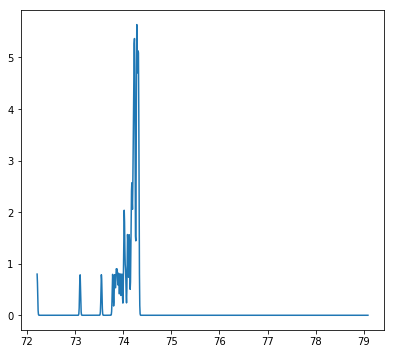

In [11]:
fig = plt.figure(figsize=(30, 20))
for jj, cde_predicted in enumerate(cde_test[:12,:]):
    ax = fig.add_subplot(3, 4, jj + 1)
    plt.plot(z_grid, cde_predicted, label=r'$\hat{p}(z| x_{\rm obs})$')
    plt.axvline(z_test[jj], color='red', label=r'$z_{\rm obs}$')
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.xlabel(r'Redshift $z$', size=20)
    plt.ylabel('CDE', size=20)
    plt.legend(loc='upper right', prop={'size': 18})
plt.show()

## Select the best parameters combination

We can use the CDE loss to guide us (the lower, the better), from the [`cdetools` package](https://github.com/tpospisi/cdetools). <br>
Here we showcase a simple grid search approach, but one can use random search or more advanced methods such as [Bayesian Optimization](https://github.com/fmfn/BayesianOptimization).

In [11]:
h_search_vec = [1e-2, 5e-2, 0.1]
neigh_search_vec = [10, 20, 50, 100]

results_search = {}
for h in h_search_vec:
    for neigh in neigh_search_vec:
        cde_test_temp = model.predict(x_test, z_grid, k=neigh, bandwidth=h)
        cde_loss_temp, std_loss_temp = cde_loss(cde_test_temp, z_grid, z_test)
        message_out = r'Bandwith: %.2f, Neighbors: %d, CDE loss: %4.2f \pm %.2f' % (
            h, neigh, cde_loss_temp, std_loss_temp)
        results_search[(h, neigh)] = (cde_loss_temp, std_loss_temp)
        print(message_out)
        
best_combination = sorted(results_search.items(), key=lambda x: x[1][0])[0]
print('\nBest CDE loss (%4.2f) is achieved using %d Neighbors and KDE bandwidth=%.2f' % (
      best_combination[1][0], best_combination[0][1], best_combination[0][0]))

Bandwith: 0.01, Neighbors: 10, CDE loss: -3.49 \pm 0.22
Bandwith: 0.01, Neighbors: 20, CDE loss: -3.53 \pm 0.15
Bandwith: 0.01, Neighbors: 50, CDE loss: -3.27 \pm 0.09
Bandwith: 0.01, Neighbors: 100, CDE loss: -2.85 \pm 0.07
Bandwith: 0.05, Neighbors: 10, CDE loss: -4.84 \pm 0.07
Bandwith: 0.05, Neighbors: 20, CDE loss: -4.29 \pm 0.06
Bandwith: 0.05, Neighbors: 50, CDE loss: -3.55 \pm 0.05
Bandwith: 0.05, Neighbors: 100, CDE loss: -3.02 \pm 0.04
Bandwith: 0.10, Neighbors: 10, CDE loss: -3.77 \pm 0.03
Bandwith: 0.10, Neighbors: 20, CDE loss: -3.50 \pm 0.03
Bandwith: 0.10, Neighbors: 50, CDE loss: -3.09 \pm 0.03
Bandwith: 0.10, Neighbors: 100, CDE loss: -2.73 \pm 0.03

Best CDE loss (-4.84) is achieved using 10 Neighbors and KDE bandwidth=0.05


## CDE Diagnostics

We can compute the PIT and HPD values over our estimated CDEs. <br>
Functions to calculate both values can be found in the [`cdetools` package](https://github.com/tpospisi/cdetools). <br>
We suggest to clone the Github repository and install it.

<code style="background:black;color:white">git clone https://github.com/tpospisi/cdetools.git </code> <br>
<code style="background:black;color:white">cd cdetools/python/ </code> <br>
<code style="background:black;color:white">python setup.py install </code> 

In [17]:
from cdetools.hpd_coverage import hpd_coverage
from cdetools.cdf_coverage import cdf_coverage
from cdetools.plot_utils import plot_with_uniform_band

# Computing the values
z_grid = np.linspace(z_train.min(), z_train.max(), n_grid)
pit_values = cdf_coverage(cde_test, z_grid, z_test)
#hpd_values = hpd_coverage(cde_test, z_grid, z_test)

Computing the number of values per each bin in the histogram under uniformity assumptions. <br>
We look at the 99% CI.

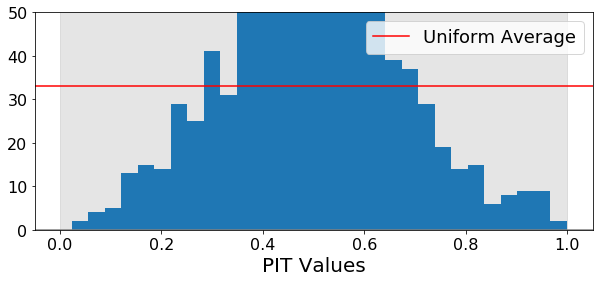

In [18]:
fig_pit = plot_with_uniform_band(values=pit_values, ci_level=0.99, x_label='PIT Values', n_bins=30)
fig_pit

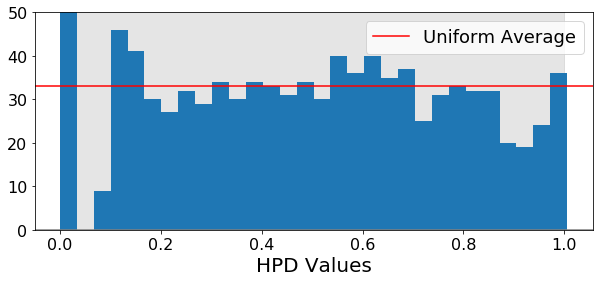

In [16]:
fig_hpd = plot_with_uniform_band(values=hpd_values, ci_level=0.99, x_label='HPD Values', n_bins=30)   
fig_hpd